t:   0%|          | 0/1260 [00:00<?, ?it/s, now=None]

Moviepy - Building video project_video_output.mp4.
Moviepy - Writing video project_video_output.mp4




t:  15%|█▍        | 183/1260 [00:18<01:33, 11.53it/s, now=None]


t:  34%|███▍      | 427/1260 [00:39<01:13, 11.27it/s, now=None]


t:  52%|█████▏    | 660/1260 [00:59<00:55, 10.86it/s, now=None]


t:  72%|███████▏  | 904/1260 [01:21<00:32, 11.10it/s, now=None]


t:  87%|████████▋ | 1095/1260 [01:40<00:16, 10.01it/s, now=None]


t:   3%|▎         | 33/1260 [02:41<10:09,  2.01it/s, now=None]  

Moviepy - Done !
Moviepy - video ready project_video_output.mp4
CPU times: user 2min 21s, sys: 19.6 s, total: 2min 41s
Wall time: 1min 57s


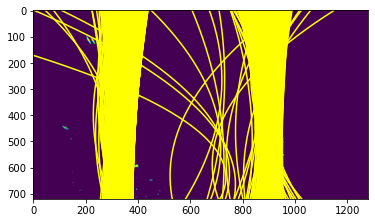

In [6]:
from moviepy.editor import VideoFileClip
import glob
import project_code as pc
import matplotlib.pyplot as plt

images = glob.glob('camera_cal/calibration*.jpg')
mtx, dist = pc.camera_calib(images)

def video_pipeline(pipeline_image):
    # Undistort the image
    undistorted_image = pc.undistort_image(pipeline_image, mtx, dist)

    # Apply the combined thresholds on the image to get a combined binary image
    color_binary, combined_binary = pc.create_thresholded_binary_image(undistorted_image)

    after_mask = pc.create_interest_mask(combined_binary)
    transformed_perspective_image, M, Minv = pc.transform_perspective(after_mask)

    # Find the lane line from the polynomials formed
    sliding_window_img, ploty, left_fit, right_fit, left_fitx, right_fitx = pc.fit_polynomial(transformed_perspective_image)

    # In the next frame, find lane lines from the lane lines of the last frame
    #result = pc.search_around_poly(sliding_window_img, left_fit, right_fit)

    # # Find the radius of curvature of the lane line
    # radius_curvature = get_radius_of_curvature(x_line_values)
    #
    # # Get radius of left and right curvature
    # left_radius_curvature = radius_curvature[0]
    # right_radius_curvature = radius_curvature[1]
    #
    # # Calculate offset in meters
    # offset_mtrs = offset()
    #
    # # Draw the lane lines on the original image by unwarping the image
    # orig_lane_image = original_lane_lines(warp_image, undistorted_image, x_line_values, MatrInv)
    
    plt.imshow(transformed_perspective_image)
    #plt.show()
    original_lane_image = pc.original_lane_lines(transformed_perspective_image, undistorted_image, (left_fitx, right_fitx), Minv)
    #pc.show_original_lane_image(original_lane_image)

    # return orig_lane_image
    return original_lane_image

output = 'project_video_output.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(video_pipeline)#NOTE: this function expects color images!!
%time white_clip.write_videofile(output, audio=False)